<a href="https://colab.research.google.com/github/PravalikaMuthoju/STAT_ML_PROJECT/blob/main/CREDITCARD_FRAUD_DETECTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff


In [2]:
data  = pd.read_csv('/content/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
data.shape

(21878, 31)

In [4]:
data.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
data.size



678218

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,...,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21877.000000,21877.000000
mean,16924.271551,-0.241060,0.222124,0.737915,0.262153,-0.175227,0.087496,-0.141011,0.019339,0.562079,...,-0.043038,-0.140156,-0.037826,0.010707,0.125683,0.029305,0.011978,0.006293,71.725300,0.003931
std,11005.409549,1.880901,1.518111,1.740947,1.451072,1.414872,1.322606,1.323924,1.383927,1.277273,...,0.849611,0.644914,0.512947,0.590807,0.436855,0.524399,0.395178,0.247253,205.034501,0.062576
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-32.092129,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-3.612114,0.000000,0.000000
25%,5496.250000,-0.960913,-0.350012,0.298029,-0.649075,-0.756733,-0.660688,-0.597972,-0.169171,-0.273362,...,-0.257010,-0.564567,-0.175530,-0.331558,-0.136296,-0.339574,-0.067305,-0.010143,5.990000,0.000000
50%,18770.500000,-0.299205,0.206484,0.888730,0.222271,-0.210143,-0.176618,-0.069763,0.026032,0.515162,...,-0.109913,-0.111903,-0.048576,0.062115,0.163900,-0.042054,0.005402,0.019665,17.430000,0.000000
75%,27778.750000,1.164867,0.858497,1.520365,1.132694,0.332839,0.481047,0.447633,0.281472,1.330385,...,0.059938,0.267688,0.074156,0.399318,0.404503,0.320185,0.095819,0.077587,62.390000,0.000000
max,31907.000000,1.960497,16.713389,4.101716,11.927512,34.099309,21.393069,34.303177,20.007208,10.392889,...,22.614889,5.805795,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7879.420000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21878 entries, 0 to 21877
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    21878 non-null  int64  
 1   V1      21878 non-null  float64
 2   V2      21878 non-null  float64
 3   V3      21878 non-null  float64
 4   V4      21878 non-null  float64
 5   V5      21878 non-null  float64
 6   V6      21878 non-null  float64
 7   V7      21878 non-null  float64
 8   V8      21878 non-null  float64
 9   V9      21878 non-null  float64
 10  V10     21878 non-null  float64
 11  V11     21878 non-null  float64
 12  V12     21878 non-null  float64
 13  V13     21878 non-null  float64
 14  V14     21878 non-null  float64
 15  V15     21878 non-null  float64
 16  V16     21878 non-null  float64
 17  V17     21878 non-null  float64
 18  V18     21878 non-null  float64
 19  V19     21878 non-null  float64
 20  V20     21878 non-null  float64
 21  V21     21878 non-null  float64
 22

In [8]:

data['Class'].value_counts()
# 0 indicates not a fraud credit(normal)
# 1 indicates a fraud credit


,count
Class,
0.0,21791
1.0,86


In [9]:
data.isnull().sum() # no null values in the data set

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


([<matplotlib.patches.Wedge at 0x7a13a8774820>,
 [Text(-2.199832234344098, 0.02716874565846891, 'Normal'),
  Text(2.19983223637112, -0.027168581531576988, 'Fraud')])

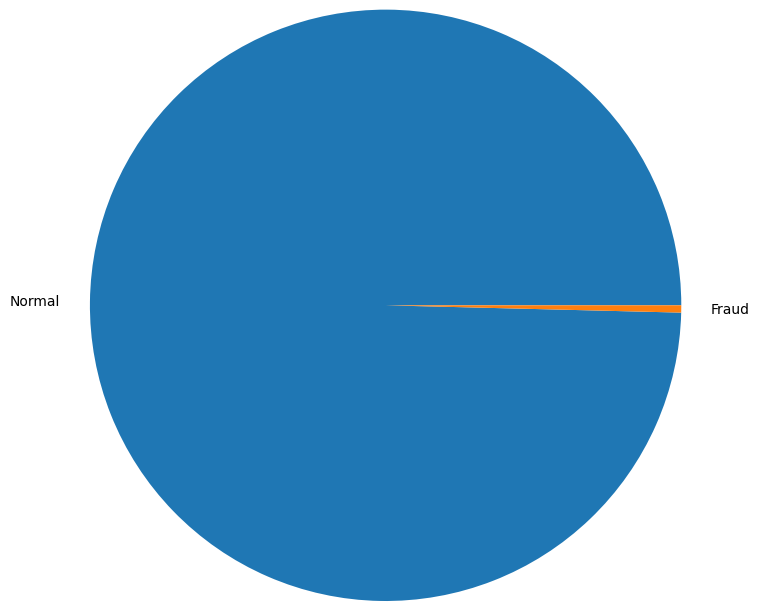

In [10]:
data['Class'].value_counts()

plt.pie(data['Class'].value_counts() ,labels=['Normal','Fraud'],radius=2)

In [11]:
from sklearn.model_selection import train_test_split

# 1. **Logistic** **Regression**

In [23]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Train test split
X = data.drop(columns=['Class'])
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [44]:
# Balance the training set using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [62]:

print("\nClass distribution after balancing:")
print(pd.Series(y_train_balanced).value_counts())


Class distribution after balancing:
Class
0.0    16343
1.0    16343
Name: count, dtype: int64


In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model train

In [46]:
logistic = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42, C=1.0)
logistic.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [47]:
#  Predictions
y_train_pred = logistic.predict(X_train_scaled)
y_test_pred = logistic.predict(X_test_scaled)

In [48]:
#  Evaluation
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [49]:
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.99
Testing Accuracy: 0.98


In [50]:
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))


Classification Report on Test Data:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      5448
         1.0       0.20      1.00      0.33        22

    accuracy                           0.98      5470
   macro avg       0.60      0.99      0.66      5470
weighted avg       1.00      0.98      0.99      5470



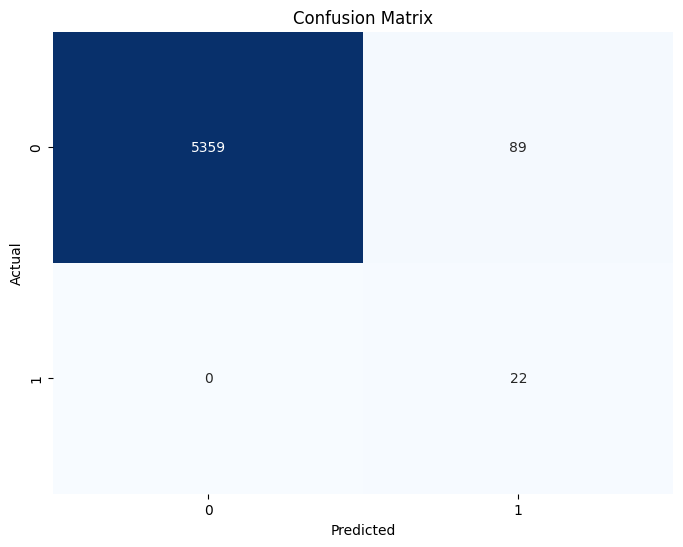

In [51]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Class Distribution:
Class
0.0    21791
1.0       86
Name: count, dtype: int64


<ipython-input-52-84aa2bd90d13>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


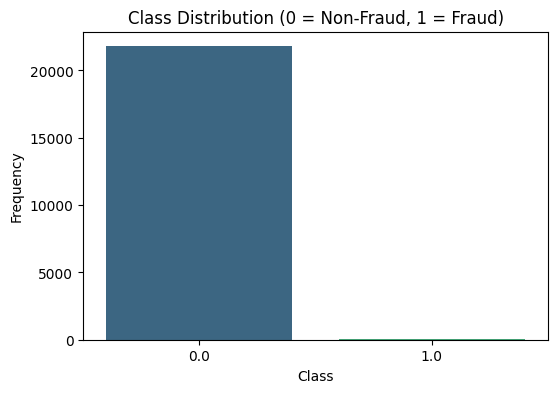

In [52]:

class_counts = data['Class'].value_counts()
print("\nClass Distribution:")
print(class_counts)

# class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


#2. K-NEAREST NEIGHBORS (KNN)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
# model training
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [55]:

#  Predictions
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)


In [56]:
#  Evaluation
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


In [57]:

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Classification Report
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.9989
Testing Accuracy: 0.9993

Classification Report on Test Data:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5448
         1.0       0.95      0.86      0.90        22

    accuracy                           1.00      5470
   macro avg       0.97      0.93      0.95      5470
weighted avg       1.00      1.00      1.00      5470



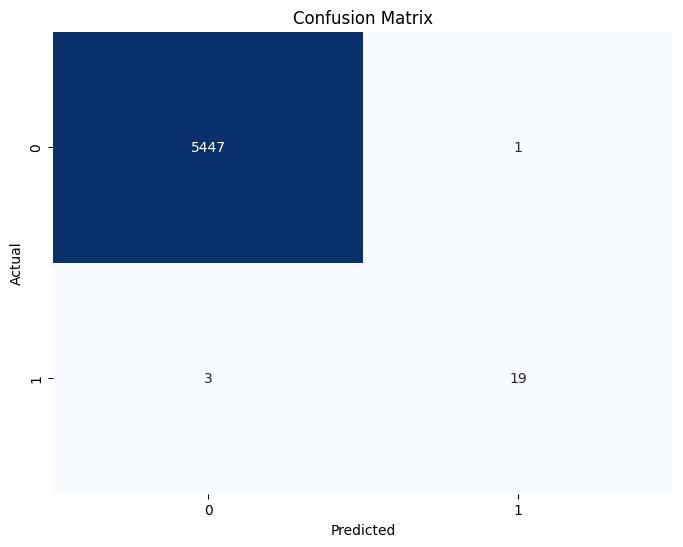

In [58]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3. SUPPORT VECTOR MACHINE (SVM)

In [76]:

from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

In [63]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train_balanced)

SVC(kernel='linear', random_state=42)

In [78]:

X_train_pred_svm = svm.predict(X_train_scaled)
y_test_pred_svm = svm.predict(X_test_scaled)

#  y_train_pred_svm using the trained model and scaled training data:
y_train_pred_svm = svm.predict(X_train_scaled)

# SVM Evaluation
train_accuracy_svm = accuracy_score(y_train_balanced, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)



In [79]:

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9940
Testing Accuracy: 0.9888


In [80]:
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))


Classification Report on Test Data:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      5448
         1.0       0.27      1.00      0.42        22

    accuracy                           0.99      5470
   macro avg       0.63      0.99      0.71      5470
weighted avg       1.00      0.99      0.99      5470



In [69]:

conf_matrix = confusion_matrix(y_test, y_test_pred)


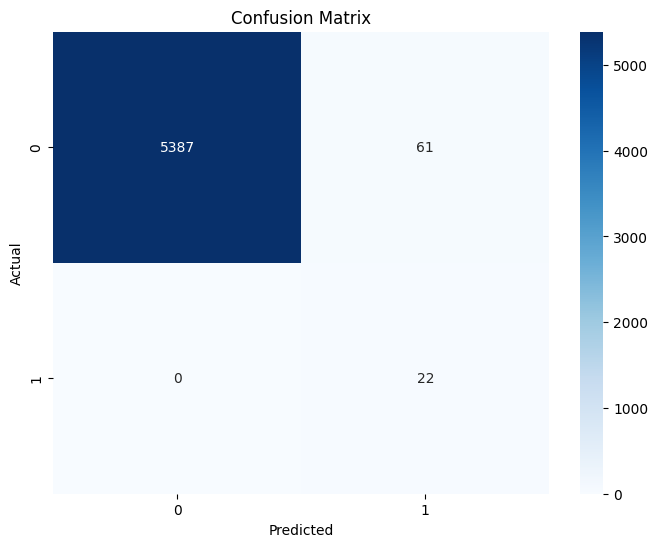

In [68]:

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# 4.PERCEPTRON

In [70]:
from sklearn.linear_model import Perceptron

MODEL TRAINING

In [71]:

print("\nPerceptron ResultS")
perceptron = Perceptron(random_state=42, max_iter=1000, tol=1e-3)
perceptron.fit(X_train_scaled, y_train_balanced)


Perceptron ResultS


Perceptron(random_state=42)

In [82]:
#Prediction
y_train_pred = perceptron.predict(X_train_scaled)
y_test_pred = perceptron.predict(X_test_scaled)

In [87]:

# Evaluation
train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [88]:

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9433
Testing Accuracy: 0.9466


In [89]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))



Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      5448
         1.0       0.06      0.91      0.12        22

    accuracy                           0.95      5470
   macro avg       0.53      0.93      0.55      5470
weighted avg       1.00      0.95      0.97      5470



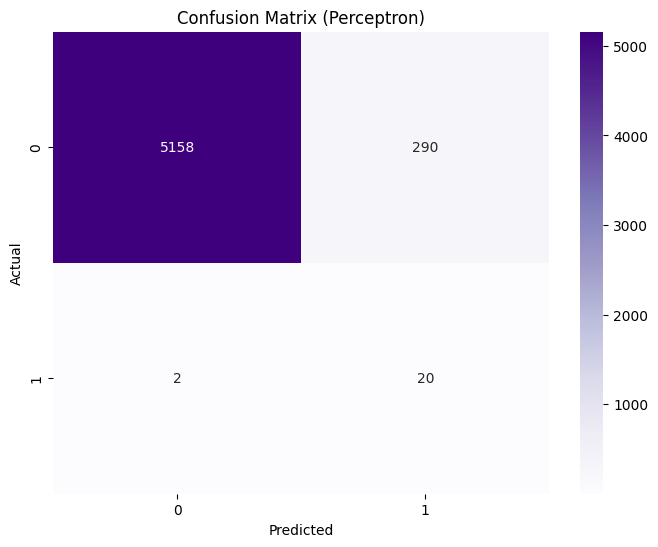

In [90]:

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix (Perceptron)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()